## Regressão Logistica

In [187]:
#### Importando bibliotecas
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [188]:
### Importando dados
df = pd.read_excel('economatica.xlsx', skiprows=3, index_col='Código')


#### Tratando os dados

In [189]:
df.columns

Index(['Unnamed: 0', 'Nome', 'Classe', 'Bolsa / Fonte', 'Tipo de Ativo',
       'Ativo /\nCancelado', 'Participação\nno Ibovespa\n\nem %',
       'Segmento listagem\nBovespa', 'Subsetor Bovespa',
       'Data da\nÚlt Cotação', 'Valor de\nMercado\nAtual\nem milhares',
       'Valor de\nMercado\n1 ano atrás\nem milhares',
       'Variação\nValor de Merc\nem 1 ano\nem milhares',
       'Enterprise\nValue\n\nem milhares', 'Fechamento\n\n\nem R$',
       'Máximo do\nFechamento\n52 semanas\nem R$',
       'Fechamento vs\nMáx 52 sem\n\nem %', 'Data do\nMáximo de\n52 semanas',
       'Volume\nno dia\n\nem milhares',
       'Volume Médio\ndiário\n3 meses\nem milhares',
       'Volume vs\nMédia 3 meses\n\nem %', 'Negócios\nno dia\n\nem unidades',
       'Negócios Médio\ndiário\n3 meses\nem unidades',
       'Negócios vs\nMédia 3 meses\n\nem %', 'Retorno\n1 dia\n\nem %',
       'Prêmio vs\nIbovespa\n1 dia\nem dif p.p.', 'Retorno\n1 mês\n\nem %',
       'Prêmio vs\nIbovespa\n1 mês\nem dif p.p.', '

In [190]:
df.drop(['Unnamed: 0', 'Ativo /\nCancelado', 'Classe', 'Nome','Bolsa / Fonte', 'Tipo de Ativo', 'Setor\nEconomatica', 'Setor NAICS\nult disponiv', 'Subsetor Bovespa', 'Data da\nÚlt Cotação', 'Data do\nÚltimo\nBalanço', 'Consolidado', 'Link da\nÚltima\nNota\nExplicativa', 'Data do\nMáximo de\n52 semanas'], axis=1, inplace=True)

In [191]:
pd.set_option('max_columns', None)
#df.head()

In [192]:
df = pd.get_dummies(df, columns=['Segmento listagem\nBovespa'])
df.replace('-', np.nan, inplace=True)
#df


In [193]:
df = df.dropna()
df.isna().sum()

Participação\nno Ibovespa\n\nem %                 0
Valor de\nMercado\nAtual\nem milhares             0
Valor de\nMercado\n1 ano atrás\nem milhares       0
Variação\nValor de Merc\nem 1 ano\nem milhares    0
Enterprise\nValue\n\nem milhares                  0
                                                 ..
Setor Econômico\nBovespa                          0
Segmento listagem\nBovespa_Novo Mercado           0
Segmento listagem\nBovespa_Nível 1                0
Segmento listagem\nBovespa_Nível 2                0
Segmento listagem\nBovespa_Tradicional            0
Length: 61, dtype: int64

In [194]:
### Criando targets
y = df['Setor Econômico\nBovespa'] ### selecionando a linha que irá ser a de teste
y = pd.DataFrame(y)




In [195]:
### Substituindo classes por numeral
le = LabelEncoder()
target = le.fit_transform(y)
y['Target'] = target


C:\Users\Jhona\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [196]:
### Criando base de treinamento
X = df.drop(['Setor Econômico\nBovespa'], axis=1)
X.head()

,Participação\nno Ibovespa\n\nem %,Valor de\nMercado\nAtual\nem milhares,Valor de\nMercado\n1 ano atrás\nem milhares,Variação\nValor de Merc\nem 1 ano\nem milhares,Enterprise\nValue\n\nem milhares,Fechamento\n\n\nem R$,Máximo do\nFechamento\n52 semanas\nem R$,Fechamento vs\nMáx 52 sem\n\nem %,Volume\nno dia\n\nem milhares,Volume Médio\ndiário\n3 meses\nem milhares,Volume vs\nMédia 3 meses\n\nem %,Negócios\nno dia\n\nem unidades,Negócios Médio\ndiário\n3 meses\nem unidades,Negócios vs\nMédia 3 meses\n\nem %,Retorno\n1 dia\n\nem %,Prêmio vs\nIbovespa\n1 dia\nem dif p.p.,Retorno\n1 mês\n\nem %,Prêmio vs\nIbovespa\n1 mês\nem dif p.p.,Retorno\n12 meses\n\nem %,Prêmio vs\nIbovespa\n12 meses\nem dif p.p.,Retorno\n36 meses\n\nem %,Prêmio vs\nIbovespa\n36 meses\nem dif p.p.,Retorno\n60 meses\n\nem %,Prêmio vs\nIbovespa\n60 meses\nem dif p.p.,Retorno\nno Ano\n\nem %,Prêmio vs\nIbovespa\nno Ano\nem dif p.p.,Volatilidade\n12 meses\n\nem %,VAR 95%\np/ 1 dia\n(últ. 12 meses)\nem %,Máx Retorno\nMensal\n(últ. 12 meses)\nem %,Míx Retorno\nMensal\n(últ. 12 meses)\nem %,Meses acima\ndo Ibovespa\n(últ. 12 meses)\nem unidades,Dias acima\ndo Ibovespa\n(últ. 12 meses)\nem %,Sharpe\n12 meses\n\nem unidades,Correlação\n60 meses\nvs IBOV,Beta\n60 meses\nvs IBOV,Dividend Yield\n12 meses\n\nem %,Dividendos e\nJCP por ação\n12 meses\nem R$,P / VPA\n\n\nem vezes,Preço / Lucro\n12 meses\n\nem vezes,Preço / Vendas\n12 meses\n\nem vezes,EV vs\nEBITDA\n12 meses\nem vezes,Dívida\nBruta\n\nem milhares,Dívida\nLíquida\n\nem milhares,Caixa\n\n\nem milhares,EBIT vs\nDívida Bruta\n12 meses\nem %,Dívida Líquida\nvs EBITDA\n12 meses\nem vezes,ROE\n12 meses\n\nem %,ROA\n12 meses\n\nem %,Lucro Líquido\n12 meses\n\nem %,Lucro p/ Ação\n12 meses\n\nem R$,Valor Patrimonial\np/ Ação\n\nem R$,Margem Bruta\n12 meses\n\nem %,Margem Líquida\n12 meses\n\nem %,EBITDA\n12 meses\n\nem milhares,Margem EBITDA\n12 meses\n\nem %,Capex vs\nDepreciação\n12 meses\nem %,Segmento listagem\nBovespa_Novo Mercado,Segmento listagem\nBovespa_Nível 1,Segmento listagem\nBovespa_Nível 2,Segmento listagem\nBovespa_Tradicional
Código,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
VALE3,15.244,4.198753e+08,4.996533e+08,-7.977804e+07,4.388853e+08,85.83,106.261816,80.772194,1936133.458,2.033036e+06,95.233598,55749,72092.375000,77.329953,0.210158,0.781494,-0.556135,-6.380009,3.652934,8.954255,138.597350,121.635399,244.370196,177.752953,10.094920,2.408198,34.212326,3.539269,11.451036,-14.714633,6.0,49.402390,0.123691,0.436322,0.451693,15.026676,14.635983,2.315962,4.580232,1.449556,3.237398,73895677.0,14838526.0,59057151.0,160.924006,0.109455,50.913922,20.083844,95687024.0,18.739226,37.060195,61.204143,31.391452,135567300.0,44.838320,219.182501,1,0,0,0
PETR4,6.936,4.518178e+08,3.829945e+08,6.882333e+07,7.202398e+08,33.00,33.880000,97.402597,1952570.947,2.134566e+06,91.473899,89273,101028.906250,88.363819,0.609756,1.181093,4.298357,-1.525517,38.706446,44.007767,56.744011,39.782061,180.089549,113.472306,15.992970,8.306248,44.712345,4.498086,13.759526,-8.562691,10.0,54.980080,1.039984,0.865138,1.581063,19.311274,5.652410,1.166311,3.187308,1.094062,2.577136,324124000.0,261810000.0,62314000.0,68.045254,0.936799,43.444773,13.952450,135054000.0,10.353566,28.294335,51.073834,34.564239,279473000.0,71.031389,20.757951,0,0,1,0
PETR3,4.519,4.518178e+08,3.829945e+08,6.882333e+07,7.202398e+08,35.87,37.200000,96.424731,501795.102,6.711942e+05,74.761539,27983,35158.781250,79.590358,-0.637119,-0.065782,3.760486,-2.063388,49.327089,54.628410,47.088495,30.126544,172.611197,105.993954,16.840391,9.153668,43.904703,4.429803,15.367965,-9.210961,10.0,54.980080,1.304583,0.852929,1.641445,19.206286,5.652410,1.267745,3.464507,1.189212,2.577136,324124000.0,261810000.0,62314000.0,68.045254,0.936799,43.444773,13.952450,135054000.0,10.353566,28.294335,51.073834,34.564239,279473000.0,71.031389,20.757951,0,0,1,0
B3SA3,3.988,8.665946e+07,1.180229e+08,-3.136341e+07,7.664813e+07,14.27,17.798042,80.177360,531130.632,5.130334e+05,1

#### Criando base de teste

In [197]:
y_test = y[-1:]
X_test = X[-1:]

#### EDA

In [198]:
#_ = pd.plotting.scatter_matrix(X, c = y['Target'], s=150, marker='D', figsize=[20, 20])

#### Rodando modelo de classificação

In [199]:
### Base de treinamento
X_train = X[:-1].values
y_train = y['Setor Econômico\nBovespa'][:-1].values

In [200]:
### Treinando dados
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [201]:
### Previsão
y_predic = knn.predict(X_test)


C:\Users\Jhona\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [202]:
print('Setor: {}'.format(y_predic))

Setor: ['Consumo cíclico']


# Testando a acurácia do modelo

In [203]:
from sklearn.model_selection import train_test_split

In [204]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y['Setor Econômico\nBovespa'].values, test_size= 0.2, random_state=42)

In [208]:
nb = np.arange(1, 15)
train_accuracy = np.empty(len(nb))
test_accuracy = np.empty(len(nb))

In [209]:
for i, k in enumerate(nb):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

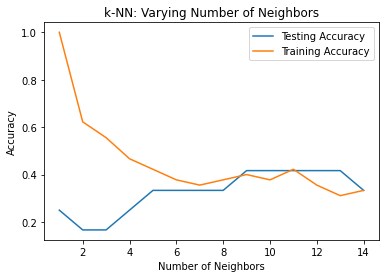

In [211]:
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(nb, test_accuracy, label = 'Testing Accuracy')
plt.plot(nb, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()